In [2]:
!pip -q install plotly 
!pip -q install yellowbrick
!pip -q install pandas
!pip -q install matplotlib
!pip -q install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [30]:
base_carros = pd.read_csv('cars.csv')

In [31]:
base_carros

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


Decidi transformar o valor do preço dos carros de Rúpias Indianas para Reais Brasileiros, para trabalhar com medidas que possuo melhor noção quantitativa.

In [32]:

base_carros['Price'] = np.multiply(base_carros['Price'] , 0.062)
base_carros

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,49600.0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,62000.0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,155000.0
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,37200.0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,52700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,179800.0
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,86800.0
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,46500.0
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,52700.0


In [33]:
base_carros.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,97588.00000
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,62016.40591
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,27900.00000
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,43400.00000
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,80600.00000
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,155000.00000
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,248000.00000


Importante perceber que a nossa base de dados não é grande, vamos perceber como isso afeta nossos algoritmos de classificação mais a frente.

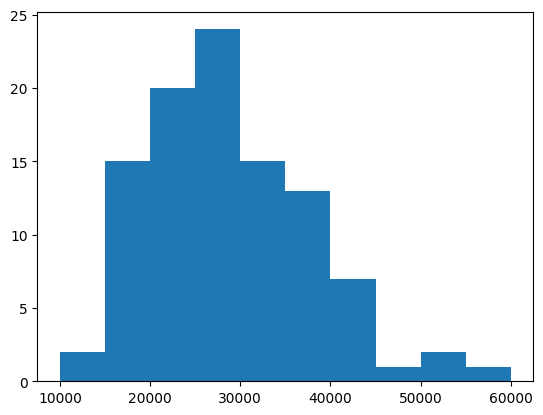

In [34]:
plt.hist(x = base_carros['Kilometers_Driven']);
#Descobrindo o formato geral dos dados de kilometragem dos nossos carros usados.

In [37]:
grafico = px.scatter_matrix(base_carros, dimensions=['Brand', 'Price', 'Kilometers_Driven'], color = 'Price')
grafico.show()

Neste último gráfico conseguimos informações relevantes do nossos dados, entre elas:
    - O gráfico de marca por preço, mostrando a influencia direta entre esses dois > marcas de luxo são mais claras no mapeamento de calor do preço;
    - O gráfico de marca por kilometragem > marcas de luxo normalmente tem kilometragem mais baixa, o que ajuda a preservar seu valor de revenda e exibe o estilo de vida dos donos em relação a aquele carro.
                Além disso, carros mais baratos tendem a ter uma maior kilometragem, pois servem mais como uma ferramenta e não tem o aspecto de mostrar status social como os de luxo, além de ser menos alvejados por criminosos. 

Assim chegamos a conclusões socio-econômicas interessantes desses dados que vem da índia, que é um país em desenvolvimento parecido com o Brasil nestes aspectos citados acima.